In [983]:
# Importing required Libraries.
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re
import statsmodels.api as sm

from scipy import stats
from scipy.stats import norm,skew
from scipy.stats.stats import pearsonr
from sklearn import linear_model
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [984]:
# Ignore all warnings and never print.
warnings.filterwarnings('ignore')

train_data = pd.read_excel('Data_Train.xlsx')
test_data = pd.read_excel('Data_Test.xlsx')

# Getting information about the datasets.
train_data.info()
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6237 entries, 0 to 6236
Data columns (total 9 columns):
Title           6237 non-null object
Author          6237 non-null object
Edition         6237 non-null object
Reviews         6237 non-null object
Ratings         6237 non-null object
Synopsis        6237 non-null object
Genre           6237 non-null object
BookCategory    6237 non-null object
Price           6237 non-null float64
dtypes: float64(1), object(8)
memory usage: 438.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Title           1560 non-null object
Author          1560 non-null object
Edition         1560 non-null object
Reviews         1560 non-null object
Ratings         1560 non-null object
Synopsis        1560 non-null object
Genre           1560 non-null object
BookCategory    1560 non-null object
dtypes: object(8)
memory usage: 97.6+ KB


In [985]:
# Displaying first 5(default) Data rows.
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",4.0 out of 5 stars,8 customer reviews,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",3.9 out of 5 stars,14 customer reviews,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",4.8 out of 5 stars,6 customer reviews,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",4.1 out of 5 stars,13 customer reviews,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",5.0 out of 5 stars,1 customer review,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [986]:
test_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",4.4 out of 5 stars,960 customer reviews,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",5.0 out of 5 stars,1 customer review,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",5.0 out of 5 stars,4 customer reviews,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",4.1 out of 5 stars,11 customer reviews,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",4.4 out of 5 stars,9 customer reviews,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


In [987]:
# Displaying the order(shape) of the matrix dataset.
train_data.shape

(6237, 9)

In [988]:
test_data.shape

(1560, 8)

In [989]:
# Getting description of all numerical features.
train_data.describe()

,Price
count,6237.000000
mean,560.707516
std,690.110657
min,25.000000
25%,249.180000
50%,373.000000
75%,599.000000
max,14100.000000


Text(0.5, 1.0, 'Price Distribution')

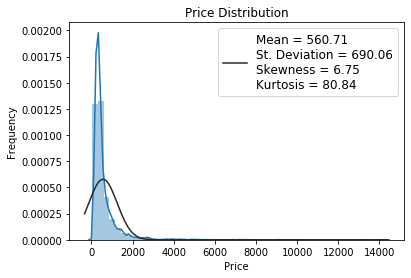

In [990]:
# Analysing the Test variable.
sns.distplot(train_data['Price'], fit = norm)
# Calculating the mean and standard deviation.
(m, std) = norm.fit(train_data['Price'])

# Checking and measuring Skewness and Kurtosis.
plt.legend(['Mean = {:.2f}\nSt. Deviation = {:.2f}\nSkewness = {:.2f}\nKurtosis = {:.2f}'.format(m, std, train_data['Price'].skew(),train_data['Price'].kurt())], fontsize = 12)
plt.ylabel('Frequency')
plt.title('Price Distribution')

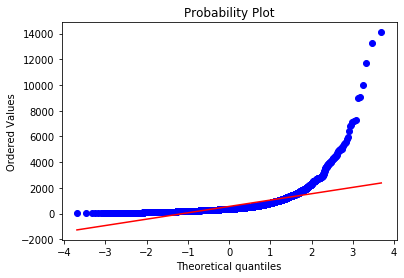

In [991]:
# Calculating the best-fit line.
plt.figure()
stats.probplot(train_data['Price'], plot = plt)
plt.show()

In [992]:
def scal_num(data):
    data['Reviews'] = data['Reviews'].str.extract('(\d.\d)', expand=True)
    data['Ratings'] = data['Ratings'].str.extract('(\d+)', expand=True)
    
    data['Reviews'] = data['Reviews'].astype(float)
    data['Ratings'] = data['Ratings'].astype(int)
    
    data['Reviews'] = data['Reviews'] * 10
    data['Reviews'] = data['Reviews'].astype(int)
    
    return data

train_data = scal_num(train_data)
test_data = scal_num(test_data)

In [993]:
train_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory,Price
0,The Prisoner's Gold (The Hunters 3),Chris Kuzneski,"Paperback,– 10 Mar 2016",40,8,THE HUNTERS return in their third brilliant no...,Action & Adventure (Books),Action & Adventure,220.00
1,Guru Dutt: A Tragedy in Three Acts,Arun Khopkar,"Paperback,– 7 Nov 2012",39,14,A layered portrait of a troubled genius for wh...,Cinema & Broadcast (Books),"Biographies, Diaries & True Accounts",202.93
2,Leviathan (Penguin Classics),Thomas Hobbes,"Paperback,– 25 Feb 1982",48,6,"""During the time men live without a common Pow...",International Relations,Humour,299.00
3,A Pocket Full of Rye (Miss Marple),Agatha Christie,"Paperback,– 5 Oct 2017",41,13,A handful of grain is found in the pocket of a...,Contemporary Fiction (Books),"Crime, Thriller & Mystery",180.00
4,LIFE 70 Years of Extraordinary Photography,Editors of Life,"Hardcover,– 10 Oct 2006",50,1,"For seven decades, ""Life"" has been thrilling t...",Photography Textbooks,"Arts, Film & Photography",965.62


In [994]:
test_data.head()

,Title,Author,Edition,Reviews,Ratings,Synopsis,Genre,BookCategory
0,The Complete Sherlock Holmes: 2 Boxes sets,Sir Arthur Conan Doyle,"Mass Market Paperback,– 1 Oct 1986",44,960,A collection of entire body of work of the She...,Short Stories (Books),"Crime, Thriller & Mystery"
1,Learn Docker - Fundamentals of Docker 18.x: Ev...,Gabriel N. Schenker,"Paperback,– Import, 26 Apr 2018",50,1,Enhance your software deployment workflow usin...,Operating Systems Textbooks,"Computing, Internet & Digital Media"
2,Big Girl,Danielle Steel,"Paperback,– 17 Mar 2011",50,4,"'Watch out, world. Here I come!'\nFor Victoria...",Romance (Books),Romance
3,Think Python: How to Think Like a Computer Sci...,Allen B. Downey,"Paperback,– 2016",41,11,"If you want to learn how to program, working w...",Programming & Software Development (Books),"Computing, Internet & Digital Media"
4,Oxford Word Skills: Advanced - Idioms & Phrasa...,Redman Gairns,"Paperback,– 26 Dec 2011",44,9,"Learn and practise the verbs, prepositions and...",Linguistics (Books),"Language, Linguistics & Writing"


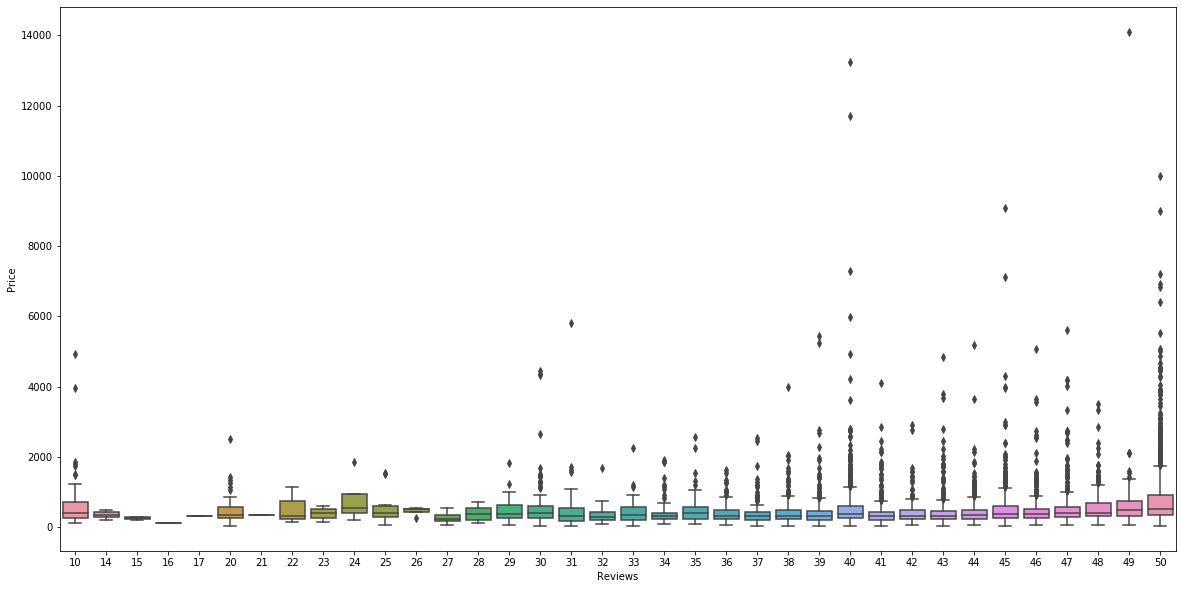

In [995]:
# Box Plot - Reviews vs Price.
data_overall_price = pd.concat([train_data['Price'], train_data['Reviews']], axis = 1)
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'Reviews',y = 'Price', data = data_overall_price)
plt.show()

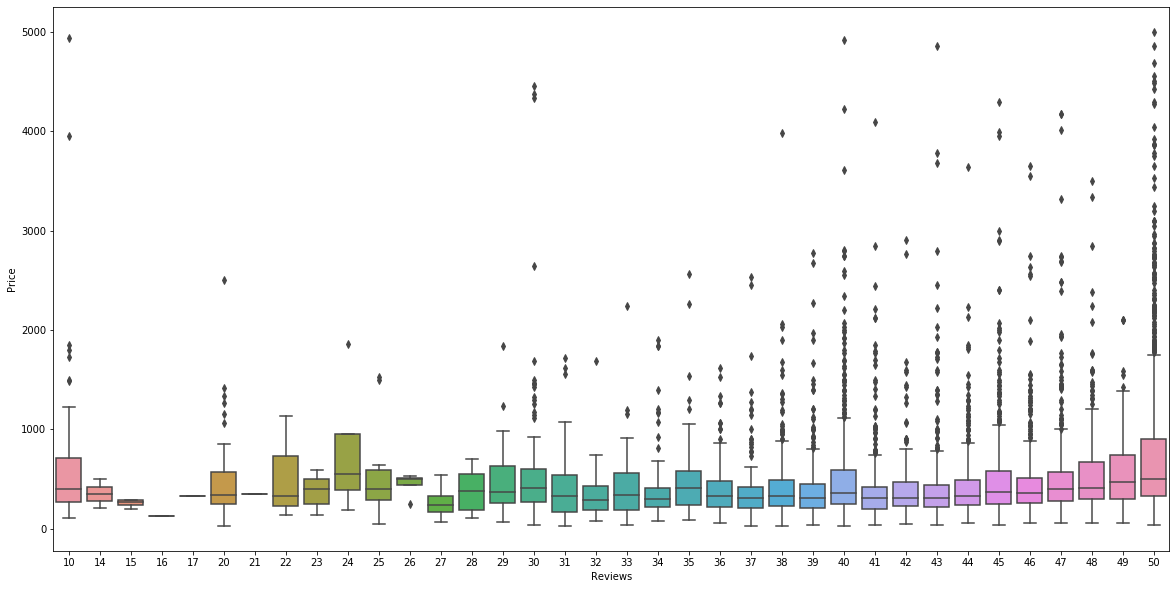

In [996]:
# Now droping the outliers and again displaying the Box Plot
train_data = train_data.drop(train_data[train_data['Price'] > 5000].index).reset_index(drop = True)
data_overall_price = pd.concat([train_data['Price'], train_data['Reviews']], axis = 1)
plt.figure(figsize=(20, 10))
sns.boxplot(x = 'Reviews',y = 'Price', data = data_overall_price)
plt.show()

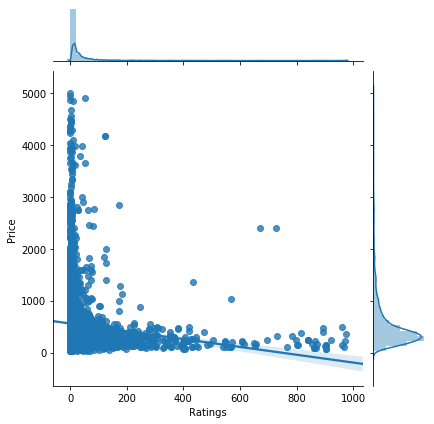

In [997]:
# Joint Plot - Ratings vs Price with removed Outliers
sns.jointplot(x = train_data['Ratings'], y = train_data['Price'], kind = 'reg')

In [998]:
#train_data = train_data.drop(train_data[(train_data['Ratings'] > 200)].index).reset_index(drop = True)
#train_data = train_data.drop(train_data[(train_data['Ratings'] > 0) & (train_data['Price'] > 1000)].index).reset_index(drop = True)

# Joint Plot - Ratings vs Price with removed Outliers
#sns.jointplot(x = train_data['Ratings'], y = train_data['Price'], kind = 'reg')

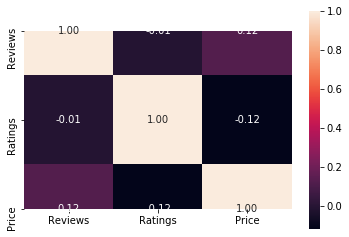

In [999]:
# Not considering categorical datatypes. 
# Plotting Correlation Heatmap with .2f float value.
train_corr = train_data.corr()
sns.heatmap(train_corr, vmax = 1.0, square = True, annot = True, fmt = '.2f')
plt.show()

In [1000]:
# Finding Missing Data and Cleaning the Data.
# Let's combine the train and test dataset to get the overall missing data.

combined_data = pd.concat((train_data, test_data)).reset_index(drop = True)
combined_data.drop(['Price'], axis = 1, inplace = True)

# Checking if the Price is dropped or not.
combined_data.describe()

,Ratings,Reviews
count,7776.000000,7776.000000
mean,29.202032,42.952932
std,82.398977,6.637521
min,1.000000,10.000000
25%,2.000000,40.000000
50%,6.000000,44.000000
75%,21.000000,48.000000
max,973.000000,50.000000


In [1001]:
combined_data.head(100)

,Author,BookCategory,Edition,Genre,Ratings,Reviews,Synopsis,Title
0,Chris Kuzneski,Action & Adventure,"Paperback,– 10 Mar 2016",Action & Adventure (Books),8,40,THE HUNTERS return in their third brilliant no...,The Prisoner's Gold (The Hunters 3)
1,Arun Khopkar,"Biographies, Diaries & True Accounts","Paperback,– 7 Nov 2012",Cinema & Broadcast (Books),14,39,A layered portrait of a troubled genius for wh...,Guru Dutt: A Tragedy in Three Acts
2,Thomas Hobbes,Humour,"Paperback,– 25 Feb 1982",International Relations,6,48,"""During the time men live without a common Pow...",Leviathan (Penguin Classics)
3,Agatha Christie,"Crime, Thriller & Mystery","Paperback,– 5 Oct 2017",Contemporary Fiction (Books),13,41,A handful of grain is found in the pocket of a...,A Pocket Full of Rye (Miss Marple)
4,Editors of Life,"Arts, Film & Photography","Hardcover,– 10 Oct 2006",Photography Textbooks,1,50,"For seven decades, ""Life"" has been thrilling t...",LIFE 70 Years of Extraordinary Photography
...,...,...,...,...,...,...,...,...
95,William Tomkins,Humour,"Paperback,– 1 Jun 1969",Sign Language Reference,2,40,Plains Indians from different tribes speaking ...,Indian Sign Language (Native American)
96,Leander Kahney,"Biographies, Diaries & True Accounts","Paperback,– 2 May 2019",Engineering & Technology (Books),2,35,"In 2011, Tim cook took on an impossible task -...",Tim Cook
97,Susan Sontag,"Arts, Film & Photography","Paperback,– 25 Sep 2008","Arts History, Theory & Criticism (Books)",9,45,Susan Sontag's On Photography is a seminal and...,On Photography (Penguin Modern Classics)
98,Agrawal P.K,"Computing, Internet & Digital Media","Paperback,– 2011",Business Communication,2,50,SAP is a great software. One needs to fully un...,Sap Hr Personnel Administration and Recruitmen...


In [1002]:
print(len(combined_data['Author'].unique()))

4361


In [1003]:
combined_data.drop('Title', axis = 1, inplace = True)
#combined_data.drop('Author', axis = 1, inplace = True)
combined_data.drop('Synopsis', axis = 1, inplace = True)

In [1004]:
combined_data.head(100)

,Author,BookCategory,Edition,Genre,Ratings,Reviews
0,Chris Kuzneski,Action & Adventure,"Paperback,– 10 Mar 2016",Action & Adventure (Books),8,40
1,Arun Khopkar,"Biographies, Diaries & True Accounts","Paperback,– 7 Nov 2012",Cinema & Broadcast (Books),14,39
2,Thomas Hobbes,Humour,"Paperback,– 25 Feb 1982",International Relations,6,48
3,Agatha Christie,"Crime, Thriller & Mystery","Paperback,– 5 Oct 2017",Contemporary Fiction (Books),13,41
4,Editors of Life,"Arts, Film & Photography","Hardcover,– 10 Oct 2006",Photography Textbooks,1,50
...,...,...,...,...,...,...
95,William Tomkins,Humour,"Paperback,– 1 Jun 1969",Sign Language Reference,2,40
96,Leander Kahney,"Biographies, Diaries & True Accounts","Paperback,– 2 May 2019",Engineering & Technology (Books),2,35
97,Susan Sontag,"Arts, Film & Photography","Paperback,– 25 Sep 2008","Arts History, Theory & Criticism (Books)",9,45
98,Agrawal P.K,"Computing, Internet & Digital Media","Paperback,– 2011",Business Communication,2,50


In [1005]:
print(combined_data['Genre'].nunique())
print('\n', combined_data['Genre'].unique())
print('\n\n', combined_data['BookCategory'].nunique())
print('\n', combined_data['BookCategory'].unique())


362

 ['Action & Adventure (Books)' 'Cinema & Broadcast (Books)'
 'International Relations' 'Contemporary Fiction (Books)'
 'Photography Textbooks' 'Healthy Living & Wellness (Books)'
 'Crime, Thriller & Mystery (Books)' 'Sports Training & Coaching (Books)'
 'Biographies & Autobiographies (Books)' 'Asian History' 'Banks & Banking'
 'Comics & Mangas (Books)' "Children's Mysteries & Curiosities (Books)"
 'Mangas' 'Artificial Intelligence'
 'Software & Business Applications (Books)' 'German'
 'International Business' 'Cricket (Books)'
 'Comics & Graphic Novels (Books)' 'PC & Video Games (Books)'
 'Short Stories (Books)' 'Astrology' 'Romance (Books)' 'Design'
 'Introductory & Beginning Programming' 'Travel (Books)' 'Sports (Books)'
 'Communications' 'Foreign Languages' 'Linguistics (Books)' 'Music Books'
 'Outdoor Survival Skills (Books)' 'True Accounts (Books)' 'Literature'
 'Society & Culture (Books)' 'Industries & Business Sectors (Books)'
 'Programming Languages (Books)' 'Media Studies

In [1006]:
# Let's take a look at Categorical Data.
# Checking the number of categorical (object) data types.
cat_object = combined_data.select_dtypes(include=['object']).columns
print('Total Categorical Features of Train : ',len(cat_object))
print('\n', cat_object)

Total Categorical Features of Train :  4

 Index(['Author', 'BookCategory', 'Edition', 'Genre'], dtype='object')


In [1007]:
print(combined_data['BookCategory'].value_counts())

Action & Adventure                      1035
Crime, Thriller & Mystery                878
Comics & Mangas                          738
Biographies, Diaries & True Accounts     732
Language, Linguistics & Writing          731
Romance                                  701
Humour                                   670
Computing, Internet & Digital Media      645
Arts, Film & Photography                 634
Sports                                   611
Politics                                 401
Name: BookCategory, dtype: int64


In [1008]:
print(combined_data['Genre'].value_counts())

Action & Adventure (Books)                   1182
Romance (Books)                               516
Biographies & Autobiographies (Books)         463
Crime, Thriller & Mystery (Books)             335
Contemporary Fiction (Books)                  325
                                             ... 
Active Outdoor Pursuits (Books)                 1
Flash Cards                                     1
Intolerance, Persecution & Fundamentalism       1
Internal Medicine                               1
Military History (Books)                        1
Name: Genre, Length: 362, dtype: int64


In [1009]:
# Removing the unwanted character (like '-') from 'Edition' column
combined_data['Edition'] = combined_data['Edition'].map(lambda x: re.sub(r'[^,a-zA-Z0-9]', ' ', x))

combined_data.head(100)

,Author,BookCategory,Edition,Genre,Ratings,Reviews
0,Chris Kuzneski,Action & Adventure,"Paperback, 10 Mar 2016",Action & Adventure (Books),8,40
1,Arun Khopkar,"Biographies, Diaries & True Accounts","Paperback, 7 Nov 2012",Cinema & Broadcast (Books),14,39
2,Thomas Hobbes,Humour,"Paperback, 25 Feb 1982",International Relations,6,48
3,Agatha Christie,"Crime, Thriller & Mystery","Paperback, 5 Oct 2017",Contemporary Fiction (Books),13,41
4,Editors of Life,"Arts, Film & Photography","Hardcover, 10 Oct 2006",Photography Textbooks,1,50
...,...,...,...,...,...,...
95,William Tomkins,Humour,"Paperback, 1 Jun 1969",Sign Language Reference,2,40
96,Leander Kahney,"Biographies, Diaries & True Accounts","Paperback, 2 May 2019",Engineering & Technology (Books),2,35
97,Susan Sontag,"Arts, Film & Photography","Paperback, 25 Sep 2008","Arts History, Theory & Criticism (Books)",9,45
98,Agrawal P.K,"Computing, Internet & Digital Media","Paperback, 2011",Business Communication,2,50


In [1010]:
# Spliting the features in the 'Edition' Column
combined_data_type = combined_data['Edition'].map(lambda x: re.split(r"\,", x))

def featureeng(data_set, data_type):
    data_set_type = []
    data_set_date = []
    data_set_mid = []
    
    ml = 1
    for i, j in enumerate(data_type):
        data_set_mid_list = []
        data_set_type.append(data_type[i][0])
        data_set_date.append(data_type[i][len(j)-1])
        
        if(len(j)>2):
            if ml < len(j)-2:
                ml = len(j)-2
            for k in range(1, len(j) - 1):
                data_set_mid_list.append(data_type[i][k])        
        else:
            data_set_mid_list.append(None)
            
        data_set_mid.append(data_set_mid_list)
    
    print(np.reshape(data_set_mid, (-1, 1)), '\n')
    print('No. of Middle Features : ', ml, '\n')
    
    data_set['Type1'] = np.reshape(data_set_type,(-1,1))
    data_set['Date'] = np.reshape(data_set_date,(-1,1))    
    data_set['Mid'] = np.reshape(data_set_mid,(-1,1))
    return data_set

combined_data = featureeng(combined_data, combined_data_type)
print('No. of Data Sets : ', len(combined_data))
combined_data.head(100)

[[list([None])]
 [list([None])]
 [list([None])]
 ...
 [list([None])]
 [list([None])]
 [list([None])]] 

No. of Middle Features :  2 

No. of Data Sets :  7776


,Author,BookCategory,Edition,Genre,Ratings,Reviews,Type1,Date,Mid
0,Chris Kuzneski,Action & Adventure,"Paperback, 10 Mar 2016",Action & Adventure (Books),8,40,Paperback,10 Mar 2016,[None]
1,Arun Khopkar,"Biographies, Diaries & True Accounts","Paperback, 7 Nov 2012",Cinema & Broadcast (Books),14,39,Paperback,7 Nov 2012,[None]
2,Thomas Hobbes,Humour,"Paperback, 25 Feb 1982",International Relations,6,48,Paperback,25 Feb 1982,[None]
3,Agatha Christie,"Crime, Thriller & Mystery","Paperback, 5 Oct 2017",Contemporary Fiction (Books),13,41,Paperback,5 Oct 2017,[None]
4,Editors of Life,"Arts, Film & Photography","Hardcover, 10 Oct 2006",Photography Textbooks,1,50,Hardcover,10 Oct 2006,[None]
...,...,...,...,...,...,...,...,...,...
95,William Tomkins,Humour,"Paperback, 1 Jun 1969",Sign Language Reference,2,40,Paperback,1 Jun 1969,[None]
96,Leander Kahney,"Biographies, Diaries & True Accounts","Paperback, 2 May 2019",Engineering & Technology (Books),2,35,Paperback,2 May 2019,[None]
97,Susan Sontag,"Arts, Film & Photography","Paperback, 25 Sep 2008","Arts History, Theory & Criticism (Books)",9,45,Paperback,25 Sep 2008,[None]
98,Agrawal P.K,"Computing, Internet & Digital Media","Paperback, 2011",Business Communication,2,50,Paperback,2011,[None]


In [1011]:
# Splitting the 'Mid'
combined_data[['Type2','Type3']] = pd.DataFrame(combined_data.Mid.values.tolist(), index=combined_data.index)

combined_data.head(100)

,Author,BookCategory,Edition,Genre,Ratings,Reviews,Type1,Date,Mid,Type2,Type3
0,Chris Kuzneski,Action & Adventure,"Paperback, 10 Mar 2016",Action & Adventure (Books),8,40,Paperback,10 Mar 2016,[None],None,None
1,Arun Khopkar,"Biographies, Diaries & True Accounts","Paperback, 7 Nov 2012",Cinema & Broadcast (Books),14,39,Paperback,7 Nov 2012,[None],None,None
2,Thomas Hobbes,Humour,"Paperback, 25 Feb 1982",International Relations,6,48,Paperback,25 Feb 1982,[None],None,None
3,Agatha Christie,"Crime, Thriller & Mystery","Paperback, 5 Oct 2017",Contemporary Fiction (Books),13,41,Paperback,5 Oct 2017,[None],None,None
4,Editors of Life,"Arts, Film & Photography","Hardcover, 10 Oct 2006",Photography Textbooks,1,50,Hardcover,10 Oct 2006,[None],None,None
...,...,...,...,...,...,...,...,...,...,...,...
95,William Tomkins,Humour,"Paperback, 1 Jun 1969",Sign Language Reference,2,40,Paperback,1 Jun 1969,[None],None,None
96,Leander Kahney,"Biographies, Diaries & True Accounts","Paperback, 2 May 2019",Engineering & Technology (Books),2,35,Paperback,2 May 2019,[None],None,None
97,Susan Sontag,"Arts, Film & Photography","Paperback, 25 Sep 2008","Arts History, Theory & Criticism (Books)",9,45,Paperback,25 Sep 2008,[None],None,None
98,Agrawal P.K,"Computing, Internet & Digital Media","Paperback, 2011",Business Communication,2,50,Paperback,2011,[None],None,None


In [1012]:
print(combined_data['Type1'].nunique())
print('\n', combined_data['Type1'].unique())

19

 ['Paperback' 'Hardcover' 'Mass Market Paperback' 'Sheet music'
 'Flexibound' 'Plastic Comb' 'Loose Leaf' 'Tankobon Softcover'
 'Perfect Paperback' 'Board book' 'Cards' 'Spiral bound' ' Kannada '
 'Library Binding' ' German ' 'Leather Bound' ' French ' ' Spanish '
 ' Chinese ']


In [1013]:
# Converting the 'Date' column into Date-Time Format
combined_data['Date'] = pd.to_datetime(combined_data['Date'], errors = 'coerce')
combined_data.head(100)

,Author,BookCategory,Edition,Genre,Ratings,Reviews,Type1,Date,Mid,Type2,Type3
0,Chris Kuzneski,Action & Adventure,"Paperback, 10 Mar 2016",Action & Adventure (Books),8,40,Paperback,2016-03-10,[None],None,None
1,Arun Khopkar,"Biographies, Diaries & True Accounts","Paperback, 7 Nov 2012",Cinema & Broadcast (Books),14,39,Paperback,2012-11-07,[None],None,None
2,Thomas Hobbes,Humour,"Paperback, 25 Feb 1982",International Relations,6,48,Paperback,1982-02-25,[None],None,None
3,Agatha Christie,"Crime, Thriller & Mystery","Paperback, 5 Oct 2017",Contemporary Fiction (Books),13,41,Paperback,2017-10-05,[None],None,None
4,Editors of Life,"Arts, Film & Photography","Hardcover, 10 Oct 2006",Photography Textbooks,1,50,Hardcover,2006-10-10,[None],None,None
...,...,...,...,...,...,...,...,...,...,...,...
95,William Tomkins,Humour,"Paperback, 1 Jun 1969",Sign Language Reference,2,40,Paperback,1969-06-01,[None],None,None
96,Leander Kahney,"Biographies, Diaries & True Accounts","Paperback, 2 May 2019",Engineering & Technology (Books),2,35,Paperback,2019-05-02,[None],None,None
97,Susan Sontag,"Arts, Film & Photography","Paperback, 25 Sep 2008","Arts History, Theory & Criticism (Books)",9,45,Paperback,2008-09-25,[None],None,None
98,Agrawal P.K,"Computing, Internet & Digital Media","Paperback, 2011",Business Communication,2,50,Paperback,2011-01-01,[None],None,None


In [1014]:
# Removing the unwanted spaces i.e., before and after column values
combined_data['Type2'] = combined_data['Type2'].str.strip()
combined_data['Type3'] = combined_data['Type3'].str.strip()

print(combined_data['Type2'].value_counts(), '\n')
print(combined_data['Type3'].value_counts())

Import                   768
Illustrated               70
Unabridged                23
Special Edition           21
Abridged                  20
Student Edition           15
International Edition     14
Box set                   13
Large Print                9
Deckle Edge                8
Audiobook                  8
Paperback                  5
Print                      4
Facsimile                  3
Kindle eBook               2
Deluxe Edition             1
DVD                        1
EveryBook                  1
Bargain Price              1
ADPCM                      1
Name: Type2, dtype: int64 

Audiobook      9
Large Print    1
Illustrated    1
Box set        1
Import         1
Name: Type3, dtype: int64


In [1015]:
# filtering data which contain 'Paperback' as a Type2 feature
print(combined_data[combined_data['Type2'] == 'Paperback'])

            Author                     BookCategory  \
2335    Gupta, R.K  Language, Linguistics & Writing   
3283   André Klein  Language, Linguistics & Writing   
5163      Larousse  Language, Linguistics & Writing   
5847       Collins  Language, Linguistics & Writing   
7368  Jiang Liping  Language, Linguistics & Writing   

                                       Edition  \
2335                 Kannada ,Paperback,  2014   
3283           German ,Paperback,  17 Nov 2014   
5163           French ,Paperback,  31 Oct 2010   
5847   Spanish ,Paperback,  Import, 7 Jun 2012   
7368           Chinese ,Paperback,  1 Jan 2014   

                                     Genre  Ratings  Reviews      Type1  \
2335  Language Learning & Teaching (Books)       53       42   Kannada    
3283                                German        2       50    German    
5163                          Dictionaries        1       50    French    
5847  Children's Language Learning (Books)        4       50   Spani

In [1016]:
# Interchanging the Type1 and Type2 Column Values if Type2 contains 'Paperback' or any Type1 features
for row_index, row in combined_data.iterrows():
    if row['Type2'] == 'Paperback':
        combined_data.set_value(row_index, 'Type1' , row['Type2'])
        combined_data.set_value(row_index, 'Type2' , row['Type1'])

In [1017]:
print(combined_data[combined_data['Type3'] == 'Audiobook'])

                 Author                          BookCategory  \
1603               Syal       Language, Linguistics & Writing   
1766        Rick Smolan   Computing, Internet & Digital Media   
2226        Sudha Murty  Biographies, Diaries & True Accounts   
2654      Scott Mariani                    Action & Adventure   
3503       Frank Miller                       Comics & Mangas   
5101  Devdutt Pattanaik  Biographies, Diaries & True Accounts   
7171      ESPN Cricinfo                                Sports   
7395           Sam Lake                       Comics & Mangas   
7624       Frank Miller                                Humour   

                                           Edition  \
1603      Paperback,  Abridged, Audiobook, Box set   
1766      Hardcover,  Abridged, Audiobook, Box set   
2226  Paperback,  Abridged, Audiobook, Large Print   
2654      Paperback,  Abridged, Audiobook, Box set   
3503      Paperback,  Abridged, Audiobook, Box set   
5101      Paperback,  Abr

In [1018]:
# Label Encoding
# Encoding the labels of categorical data to give meaning to their specific order.
features = ('Author',)

for col in features:
    lbe = LabelEncoder()
    lbe.fit(list(combined_data[col].values))
    # Replacing with the frequencies.
    combined_data[col] = lbe.transform(list(combined_data[col].values))

combined_data.head(100)

,Author,BookCategory,Edition,Genre,Ratings,Reviews,Type1,Date,Mid,Type2,Type3
0,746,Action & Adventure,"Paperback, 10 Mar 2016",Action & Adventure (Books),8,40,Paperback,2016-03-10,[None],None,None
1,369,"Biographies, Diaries & True Accounts","Paperback, 7 Nov 2012",Cinema & Broadcast (Books),14,39,Paperback,2012-11-07,[None],None,None
2,4034,Humour,"Paperback, 25 Feb 1982",International Relations,6,48,Paperback,1982-02-25,[None],None,None
3,79,"Crime, Thriller & Mystery","Paperback, 5 Oct 2017",Contemporary Fiction (Books),13,41,Paperback,2017-10-05,[None],None,None
4,1135,"Arts, Film & Photography","Hardcover, 10 Oct 2006",Photography Textbooks,1,50,Hardcover,2006-10-10,[None],None,None
...,...,...,...,...,...,...,...,...,...,...,...
95,4302,Humour,"Paperback, 1 Jun 1969",Sign Language Reference,2,40,Paperback,1969-06-01,[None],None,None
96,2247,"Biographies, Diaries & True Accounts","Paperback, 2 May 2019",Engineering & Technology (Books),2,35,Paperback,2019-05-02,[None],None,None
97,3922,"Arts, Film & Photography","Paperback, 25 Sep 2008","Arts History, Theory & Criticism (Books)",9,45,Paperback,2008-09-25,[None],None,None
98,82,"Computing, Internet & Digital Media","Paperback, 2011",Business Communication,2,50,Paperback,2011-01-01,[None],None,None


In [1019]:
# One Hot Encoding
combined_data = pd.concat([combined_data, pd.get_dummies(combined_data['Type1'], prefix='Bind')], axis=1)
combined_data = pd.concat([combined_data, pd.get_dummies(combined_data['Type2'])], axis=1)
combined_data = pd.concat([combined_data, pd.get_dummies(combined_data['BookCategory'], prefix='Cat')], axis=1)
combined_data = pd.concat([combined_data, pd.get_dummies(combined_data['Genre'], prefix='Genre')], axis=1)

combined_data.drop('Edition', axis = 1, inplace = True)
combined_data.drop('Mid', axis = 1, inplace = True)
combined_data.drop('Type1', axis = 1, inplace = True)
combined_data.drop('Type2', axis = 1, inplace = True)
combined_data.drop('BookCategory', axis = 1, inplace = True)
combined_data.drop('Genre', axis = 1, inplace = True)

combined_data.head(100)

,Author,Ratings,Reviews,Date,Type3,Bind_Board book,Bind_Cards,Bind_Flexibound,Bind_Hardcover,Bind_Leather Bound,...,"Genre_Walking, Hiking & Trekking (Books)",Genre_Waste Management,Genre_Winter Sports (Books),"Genre_Words, Language & Grammar Reference",Genre_Workbooks,Genre_World African & Middle Eastern Literature,Genre_Writing Guides (Books),Genre_XHTML Software Programming,Genre_Young Adults' Money & Jobs (Books),Genre_Zoology
0,746,8,40,2016-03-10,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,369,14,39,2012-11-07,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4034,6,48,1982-02-25,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,79,13,41,2017-10-05,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1135,1,50,2006-10-10,None,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4302,2,40,1969-06-01,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,2247,2,35,2019-05-02,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,3922,9,45,2008-09-25,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,82,2,50,2011-01-01,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1020]:
combined_data['Audiobook'] = (combined_data['Type3'] == 'Audiobook').astype(int)
combined_data['Large Print'] = (combined_data['Type3'] == 'Large Print').astype(int)
combined_data['Box set'] = (combined_data['Type3'] == 'Box set').astype(int)
combined_data['Import'] = (combined_data['Type3'] == 'Import').astype(int)
combined_data['Illustrated'] = (combined_data['Type3'] == 'Illustrated').astype(int)

combined_data.head(100)

,Author,Ratings,Reviews,Date,Type3,Bind_Board book,Bind_Cards,Bind_Flexibound,Bind_Hardcover,Bind_Leather Bound,...,"Genre_Walking, Hiking & Trekking (Books)",Genre_Waste Management,Genre_Winter Sports (Books),"Genre_Words, Language & Grammar Reference",Genre_Workbooks,Genre_World African & Middle Eastern Literature,Genre_Writing Guides (Books),Genre_XHTML Software Programming,Genre_Young Adults' Money & Jobs (Books),Genre_Zoology
0,746,8,40,2016-03-10,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,369,14,39,2012-11-07,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4034,6,48,1982-02-25,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,79,13,41,2017-10-05,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1135,1,50,2006-10-10,None,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4302,2,40,1969-06-01,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,2247,2,35,2019-05-02,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,3922,9,45,2008-09-25,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,82,2,50,2011-01-01,None,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1021]:
print(combined_data['Audiobook'][combined_data['Type3'] == 'Audiobook'])
combined_data.drop('Type3', axis = 1, inplace = True)
combined_data.head()

1603    1
1766    1
2226    1
2654    1
3503    1
5101    1
7171    1
7395    1
7624    1
Name: Audiobook, dtype: int32


,Author,Ratings,Reviews,Date,Bind_Board book,Bind_Cards,Bind_Flexibound,Bind_Hardcover,Bind_Leather Bound,Bind_Library Binding,...,"Genre_Walking, Hiking & Trekking (Books)",Genre_Waste Management,Genre_Winter Sports (Books),"Genre_Words, Language & Grammar Reference",Genre_Workbooks,Genre_World African & Middle Eastern Literature,Genre_Writing Guides (Books),Genre_XHTML Software Programming,Genre_Young Adults' Money & Jobs (Books),Genre_Zoology
0,746,8,40,2016-03-10,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,369,14,39,2012-11-07,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4034,6,48,1982-02-25,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,79,13,41,2017-10-05,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1135,1,50,2006-10-10,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1022]:
combined_data['Day'] = pd.DatetimeIndex(combined_data['Date']).day
combined_data['Month'] = pd.DatetimeIndex(combined_data['Date']).month
combined_data['Year'] = pd.DatetimeIndex(combined_data['Date']).year

combined_data.drop('Date', axis = 1, inplace = True)

combined_data.head(100)

,Author,Ratings,Reviews,Bind_Board book,Bind_Cards,Bind_Flexibound,Bind_Hardcover,Bind_Leather Bound,Bind_Library Binding,Bind_Loose Leaf,...,"Genre_Words, Language & Grammar Reference",Genre_Workbooks,Genre_World African & Middle Eastern Literature,Genre_Writing Guides (Books),Genre_XHTML Software Programming,Genre_Young Adults' Money & Jobs (Books),Genre_Zoology,Day,Month,Year
0,746,8,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,10.0,3.0,2016.0
1,369,14,39,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,7.0,11.0,2012.0
2,4034,6,48,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25.0,2.0,1982.0
3,79,13,41,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5.0,10.0,2017.0
4,1135,1,50,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,10.0,10.0,2006.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,4302,2,40,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,6.0,1969.0
96,2247,2,35,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2.0,5.0,2019.0
97,3922,9,45,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,25.0,9.0,2008.0
98,82,2,50,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1.0,1.0,2011.0


In [1023]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Columns: 417 entries, Author to Year
dtypes: float64(3), int32(7), int64(1), uint8(406)
memory usage: 3.5 MB


In [1024]:
# Checking for missing ratio of the Dataset.
combined_data_na = (combined_data.isnull().sum() / len(combined_data)) * 100
combined_data_na = combined_data_na.drop(combined_data_na[combined_data_na == 0].index)
missing_ratio = pd.DataFrame({'Missing Ratio':combined_data_na})
missing_ratio

,Missing Ratio
Day,0.385802
Month,0.385802
Year,0.385802


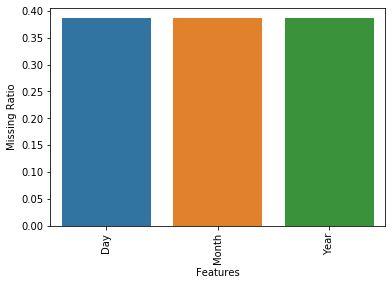

In [1025]:
# Plotting Bar Graph for the Missing Ratios.
plt.figure()
sns.barplot(x = combined_data_na.index, y = combined_data_na)
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Missing Ratio')
plt.show()

In [1026]:
combined_data['Year'] = combined_data['Year'].fillna(combined_data['Year'].mode()[0])
combined_data['Day'] = combined_data['Day'].fillna('01')
combined_data['Month'] = combined_data['Month'].fillna('01')

combined_data['Day'] = combined_data['Day'].astype(int)
combined_data['Month'] = combined_data['Month'].astype(int)
combined_data['Year'] = combined_data['Year'].astype(int)

print("Mode of 'Year' column : ", combined_data['Year'].mode()[0])
combined_data.info()

Mode of 'Year' column :  2018
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7776 entries, 0 to 7775
Columns: 417 entries, Author to Year
dtypes: int32(10), int64(1), uint8(406)
memory usage: 3.4 MB


In [1027]:
# Checking the skew of all numerical features.
num_features = combined_data.dtypes[combined_data.dtypes != 'object'].index
skewed_features = combined_data[num_features].apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
feature_skewness = pd.DataFrame({'Skewness': skewed_features})
print(feature_skewness.shape)
feature_skewness

(417, 1)


,Skewness
Genre_Ecology,88.164619
Genre_Biology & Life Sciences,88.164619
Bind_Plastic Comb,88.164619
Genre_Immunology,88.164619
Genre_Active Outdoor Pursuits (Books),88.164619
...,...
Author,0.036759
Month,-0.010891
Reviews,-1.659329
Bind_Paperback,-1.756938


In [1028]:
# Getting Box Cox Transormation of highly skewed features.
from scipy.special import boxcox1p 
feature_skewness = feature_skewness[abs(feature_skewness) > 0.75]

alpha = 0.15 # lambda
for col in skewed_features.index:
    combined_data[col] = boxcox1p(combined_data[col], alpha)

combined_data = pd.get_dummies(combined_data)
combined_data.head(100)

,Author,Ratings,Reviews,Bind_Board book,Bind_Cards,Bind_Flexibound,Bind_Hardcover,Bind_Leather Bound,Bind_Library Binding,Bind_Loose Leaf,...,"Genre_Words, Language & Grammar Reference",Genre_Workbooks,Genre_World African & Middle Eastern Literature,Genre_Writing Guides (Books),Genre_XHTML Software Programming,Genre_Young Adults' Money & Jobs (Books),Genre_Zoology,Day,Month,Year
0,11.318184,2.602594,4.969939,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.885846,1.540963,14.207763
1,9.519313,3.340760,4.926918,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.440268,3.011340,14.201549
2,16.495825,2.259674,5.285266,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.201461,1.194318,14.154600
3,6.197221,3.237728,5.012077,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.055642,2.885846,14.209315
4,12.485393,0.730463,5.357203,0.0,0.0,0.0,0.730463,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.885846,2.885846,14.192207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,16.720329,1.194318,4.969939,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.730463,2.259674,14.134068
96,14.550051,1.194318,4.745132,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.194318,2.055642,14.212418
97,16.398229,2.750250,5.172535,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.201461,2.750250,14.195323
98,6.268453,1.194318,5.357203,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.730463,0.730463,14.199993


In [1029]:
#combined_data.drop('Author', axis = 1, inplace = True)

Text(0.5, 1.0, 'Price Distribution')

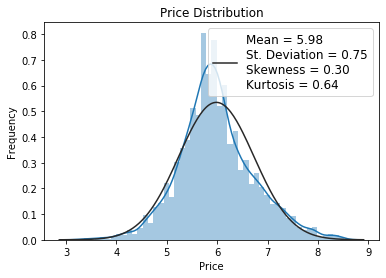

In [1030]:
# Now let's fix the skewness and kurtosis.
# Fixing all skewed data to be more normal.

# The Numpy fuction log1p applies log(1+x) to all elements of the column.
train_data["Price"] = np.log1p(train_data["Price"])

# Storing the value of train data 'Price' for future reference.
train_price = train_data.Price.values

sns.distplot(train_data['Price'], fit = norm)
(m, std) = norm.fit(train_data['Price'])

# Checking and measuring Skewness and Kurtosis.
plt.legend(['Mean = {:.2f}\nSt. Deviation = {:.2f}\nSkewness = {:.2f}\nKurtosis = {:.2f}'.format(m, std, train_data['Price'].skew(),train_data['Price'].kurt())], fontsize = 12)
plt.ylabel('Frequency')
plt.title('Price Distribution')

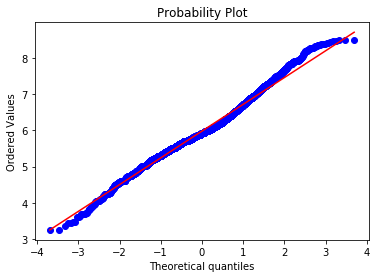

In [1031]:
# Calculating the best-fit line.
plt.figure()
stats.probplot(train_data["Price"], plot = plt)
plt.show()

In [1032]:
# Splitting the combined_data into train_data and test_data.
no_of_train_data = train_data.shape[0]
# train_data SalePrice stored in train_saleprice during concatenation of datasets.

train_set = pd.DataFrame(combined_data[:no_of_train_data])
test_set = pd.DataFrame(combined_data[no_of_train_data:])
pd.DataFrame(train_set.values).head()

,0,1,2,3,4,5,6,7,8,9,...,407,408,409,410,411,412,413,414,415,416
0,11.318184,2.602594,4.969939,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.885846,1.540963,14.207763
1,9.519313,3.340760,4.926918,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.440268,3.011340,14.201549
2,16.495825,2.259674,5.285266,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.201461,1.194318,14.154600
3,6.197221,3.237728,5.012077,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.055642,2.885846,14.209315
4,12.485393,0.730463,5.357203,0.0,0.0,0.0,0.730463,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.885846,2.885846,14.192207


In [1033]:
# Let's now implement Linear Regression Models - Lasso, ElasticNet, KernelRidge and Gradient Boosting Regressor.
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.base import BaseEstimator, TransformerMixin, RegressorMixin, clone
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score, mean_squared_log_error

In [1034]:
# Cross Validation with K-folds with 5 number of folds.
def rmsle_cv(model):
    #skf = StratifiedKFold(5, shuffle=True, random_state=42).get_n_splits(train_set.values)
    #kf = KFold(5, shuffle=True, random_state=42).get_n_splits(train_set.values)
    model.fit(train_set.values, train_price)
    train_predictions = model.predict(train_set.values)
    rmse = np.sqrt(mean_squared_log_error(train_price, train_predictions))
    
    return rmse

In [1035]:
laso = make_pipeline(RobustScaler(), Lasso(alpha = 0.0005, random_state = 1))

elasnet = make_pipeline(RobustScaler(), ElasticNet(alpha = 0.0005, l1_ratio = 0.9, random_state = 3))

kerridL = KernelRidge(alpha = 0.6, kernel = 'linear', degree = 1, coef0 = 2.5)

kerridP = KernelRidge(alpha = 0.6, kernel = 'polynomial', degree = 2, coef0 = 2.5)

gboost = GradientBoostingRegressor(n_estimators = 300, learning_rate = 0.05, max_depth = 4, max_features = 'sqrt', random_state = 5, min_samples_split = 10, min_samples_leaf = 10)

In [1036]:
score = rmsle_cv(laso)
# Displaying the Batch Scores.
#print(pd.DataFrame({'Batch Score':score}))
print('Lasso Score           : {:.5f}\n'.format(score.mean(), score.std()))

score = rmsle_cv(elasnet)
#print(pd.DataFrame({'Batch Score':score}))
print('ElasticNet Score      : {:.5f}\n'.format(score.mean(), score.std()))

score = rmsle_cv(kerridL)
#print(pd.DataFrame({'Batch Score':score}))
print('KernelRidge Score (L) : {:.5f}\n'.format(score.mean() ,score.std()))

#score = rmsle_cv(kerridP)
#print(pd.DataFrame({'Batch Score':score}))
#print('KernelRidge Score (P) : (Mean = {:.5f}, Sigma = {:.5f})\n'.format(score.mean() ,score.std()))

score = rmsle_cv(gboost)
#print(pd.DataFrame({'Batch Score':score}))
print('GBoost Score          : {:.5f}\n'.format(score.mean(), score.std()))


Lasso Score           : 0.08698

ElasticNet Score      : 0.08684

KernelRidge Score (L) : 0.08345

GBoost Score          : 0.08274



In [1037]:
# Finding the average of all the four models.
class average_model(BaseEstimator, RegressorMixin, TransformerMixin):
    def __init__(self, models):
        self.models = models
    
    def fit(self, values, price):
        # Cloning the original models to train and fit the data.
        self.models_ = [clone(x) for x in self.models]
        
        # Training the cloned models.
        for model in self.models_:
            model.fit(values, price)
        
        return self
    
    # Predicting for cloned data and averaging out them.
    def predict(self, values):
        predictions = np.column_stack([
            model.predict(values) for model in self.models_
        ])
        
        return np.mean(predictions, axis = 1)

In [1038]:
final_averaged_model = average_model(models = (laso, elasnet, kerridL, gboost))

In [1039]:
# Final Training and Prediction of the Averaged Model.
# Fitting Train Data
final_averaged_model.fit(train_set.values, train_price)

final_train_predictions = final_averaged_model.predict(train_set.values)

final_score = np.sqrt(mean_squared_log_error(train_price, final_train_predictions))
print('Final Averaged Model RMSLE    : {:.5f}'.format(final_score.mean(), final_score.std()))

test_predictions = np.expm1(final_averaged_model.predict(test_set.values))
test_predictions = test_predictions.round(2)

print('Train Accuracy                :',  (1-final_score)*100, '%')

model = sm.OLS(test_predictions, test_set.values).fit()
predict_ols = model.predict(test_set.values)
model.summary() # Showing out the statistics

# Here we cannot find the Test Accuracy because we are not provided with the Test 'Price'

Final Averaged Model RMSLE    : 0.08425
Train Accuracy                : 91.57498874781724 %


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:                     113.3
Date:                Sat, 19 Oct 2019   Prob (F-statistic):               0.00
Time:                        23:41:05   Log-Likelihood:                -8002.8
No. Observations:                1560   AIC:                         1.653e+04
Df Residuals:                    1300   BIC:                         1.792e+04
Df Model:                         259                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.2042      0.463     -0.441      0.660      -1.113       0.705
x2           -23.8560      0.653    -36.532      0.000     -25.137     -22.575
x3           104.2074      4.032     25.846      0.000      96.298     112.117
const      -3.608e-10   6.94e-11     -5.202      0.000   -4.97e-10   -2.25e-10
x4          6859.6439   1317.541      5.206      0.000    4274.904    9444.384
x5          6809.9896   1316.319      5.174      0.000    4227.647    9392.332
x6          7006.2271   1316.089      5.324      0.000    4424.337    9588.117
x7           2.25e-10   4.34e-11      5.183      0.000     1.4e-10     3.1e-10
x8         -3.245e-10   6.24e-11     -5.199      0.000   -4.47e-10   -2.02e-10
x9          6801.7350   1317.202      5.164      0.000    4217.660    9385.810
x10         6659.2119   1312.713      5.073      0.000    4083.944    9234.480
x11         6679.0109   1315.285      5.078      0.000    4098.697    9259.324
x12        -2.632e-10   4.99e-11     -5.278      0.000   -3.61e-10   -1.65e-10
x13         5.236e-10   1.01e-10      5.199      0.000    3.26e-10    7.21e-10
x14         6928.8679   1318.123      5.257      0.000    4342.986    9514.750
x15         6813.3945   1316.318      5.176      0.000    4231.054    9395.735
x16         -1.25e-10   2.46e-11     -5.087      0.000   -1.73e-10   -7.68e-11
x17          -27.1264     65.138     -0.416      0.677    -154.913     100.661
x18         -5.99e-10   1.15e-10     -5.187      0.000   -8.25e-10   -3.72e-10
x19         1.126e-10   2.17e-11      5.186      0.000       7e-11    1.55e-10
x20        -1.985e-10   3.88e-11     -5.120      0.000   -2.75e-10   -1.22e-10
x21        -3.339e-10   6.42e-11     -5.197      0.000    -4.6e-10   -2.08e-10
x22         1.123e-10   2.17e-11      5.171      0.000    6.97e-11    1.55e-10
x23           62.3615     62.250      1.002      0.317     -59.760     184.483
x24           14.2308     74.071      0.192      0.848    -131.080     159.542
x25        -3.386e-10   6.53e-11     -5.183      0.000   -4.67e-10    -2.1e-10
x26            7.2372     88.328      0.082      0.935    -166.044     180.519
x27        -1.349e-10   2.66e-11     -5.073      0.000   -1.87e-10   -8.27e-11
x28          -72.8085     64.802     -1.124      0.261    -199.937      54.320
x29         1.387e-10   2.67e-11      5.206      0.000    8.64e-11    1.91e-10
x30         2.726e-10   5.31e-11      5.132      0.000    1.68e-10    3.77e-10
x31        -1.486e-10   2.79e-11     -5.317      0.000   -2.03e-10   -9.38e-11
x32          142.3182     62.921      2.262      0.024      18.880     265.756
x33          2.52e-10   4.82e-11      5.226      0.000    1.57e-10    3.47e-10
x34          -50.4927     32.073     -1.574      0.116    -113.413      12.427
x35           13.7413     86.927      0.158      0.874    -156.791     184.273
x3

In [1040]:
# We reached to the final step - Submission.
submission = pd.DataFrame()
submission['Price'] = test_predictions
submission.to_excel('NewPredictions6.xlsx', index = False)
submission_data = pd.read_excel('NewPredictions6.xlsx')
submission_data.head(10)

,Price
0,194.52
1,854.48
2,329.42
3,550.72
4,397.48
5,584.49
6,694.82
7,259.34
8,412.52
9,317.31


,Price
count,1560.000000
mean,443.369288
std,198.587939
min,120.500000
25%,301.155000
50%,391.150000
75%,542.057500
max,1739.240000


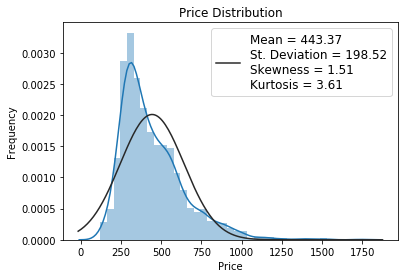

In [1041]:
# Analysing the Submitted Test SalePrice
sns.distplot(submission_data['Price'], fit = norm)
(m, std) = norm.fit(submission_data['Price'])

# Checking and measuring Skewness and Kurtosis.
plt.legend(['Mean = {:.2f}\nSt. Deviation = {:.2f}\nSkewness = {:.2f}\nKurtosis = {:.2f}'.format(m, std, submission_data['Price'].skew(), submission_data['Price'].kurt())], fontsize = 12)
plt.ylabel('Frequency')
plt.title('Price Distribution')

# Checking the parameters of Test SalePrice whether they are close to our Train Data SalePrice or not.
submission_data.describe()
# Since the data parameters approximately matches, hence we conclude.

Text(0.5, 1.0, 'Price Distribution')

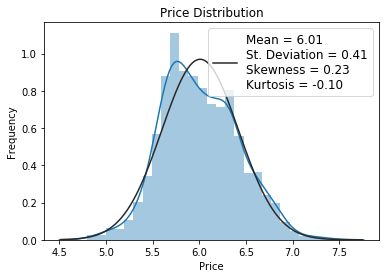

In [1042]:
# Now let's fix the skewness and kurtosis.
# Fixing all skewed data to be more normal.
# The Numpy fuction log1p applies log(1+x) to all elements of the column.
submission_data['Price'] = np.log1p(submission_data['Price'])

sns.distplot(submission_data['Price'], fit = norm)
(m, std) = norm.fit(submission_data['Price'])

# Checking and measuring Skewness and Kurtosis.
plt.legend(['Mean = {:.2f}\nSt. Deviation = {:.2f}\nSkewness = {:.2f}\nKurtosis = {:.2f}'.format(m, std, submission_data['Price'].skew(), submission_data['Price'].kurt())], fontsize = 12)
plt.ylabel('Frequency')
plt.title('Price Distribution')

In [1043]:
import tensorflow as tf
from tensorflow.keras import layers

nn_model = tf.keras.Sequential()

# The Input Layer :
nn_model.add(layers.Dense(417, kernel_initializer='normal', input_dim = train_set.shape[1], activation='relu'))

# The Hidden Layers
nn_model.add(layers.Dense(256, kernel_initializer='normal', activation='relu'))
nn_model.add(layers.Dense(256, kernel_initializer='normal', activation='relu'))
nn_model.add(layers.Dense(256, kernel_initializer='normal', activation='relu'))

# The Output Layer
nn_model.add(layers.Dense(1, kernel_initializer='normal', activation='linear'))

# Compile the network
nn_model.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(), optimizer=tf.keras.optimizers.Adam(lr = 0.001), metrics=['mean_squared_logarithmic_error'])
nn_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 417)               174306    
_________________________________________________________________
dense_6 (Dense)              (None, 256)               107008    
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_8 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 257       
Total params: 413,155
Trainable params: 413,155
Non-trainable params: 0
_________________________________________________________________


In [1044]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = tf.keras.callbacks.ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [1045]:
nn_model.fit(train_set, train_price, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 4972 samples, validate on 1244 samples
Epoch 1/500
4896/4972 [============================>.] - ETA: 0s - loss: 0.0613 - mean_squared_logarithmic_error: 0.0613
Epoch 00001: val_loss improved from inf to 0.00887, saving model to Weights-001--0.00887.hdf5
4972/4972 [==============================] - 2s 338us/sample - loss: 0.0606 - mean_squared_logarithmic_error: 0.0606 - val_loss: 0.0089 - val_mean_squared_logarithmic_error: 0.0089
Epoch 2/500
4928/4972 [============================>.] - ETA: 0s - loss: 0.0082 - mean_squared_logarithmic_error: 0.0082
Epoch 00002: val_loss improved from 0.00887 to 0.00870, saving model to Weights-002--0.00870.hdf5
4972/4972 [==============================] - 1s 204us/sample - loss: 0.0082 - mean_squared_logarithmic_error: 0.0082 - val_loss: 0.0087 - val_mean_squared_logarithmic_error: 0.0087
Epoch 3/500
4736/4972 [===========================>..] - ETA: 0s - loss: 0.0076 - mean_squared_logarithmic_error: 0.0076
Epoch 00003: val_loss improved from

4800/4972 [===========================>..] - ETA: 0s - loss: 0.0056 - mean_squared_logarithmic_error: 0.0056
Epoch 00023: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 190us/sample - loss: 0.0057 - mean_squared_logarithmic_error: 0.0057 - val_loss: 0.0081 - val_mean_squared_logarithmic_error: 0.0081
Epoch 24/500
4960/4972 [============================>.] - ETA: 0s - loss: 0.0058 - mean_squared_logarithmic_error: 0.0058
Epoch 00024: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 196us/sample - loss: 0.0058 - mean_squared_logarithmic_error: 0.0058 - val_loss: 0.0092 - val_mean_squared_logarithmic_error: 0.0092
Epoch 25/500
4736/4972 [===========================>..] - ETA: 0s - loss: 0.0057 - mean_squared_logarithmic_error: 0.0057
Epoch 00025: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 177us/sample - loss: 0.0057 - mean_squared_logarithmic_error: 0.0057 - val_loss: 0.0

4800/4972 [===========================>..] - ETA: 0s - loss: 0.0044 - mean_squared_logarithmic_error: 0.0044
Epoch 00046: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 187us/sample - loss: 0.0044 - mean_squared_logarithmic_error: 0.0044 - val_loss: 0.0083 - val_mean_squared_logarithmic_error: 0.0083
Epoch 47/500
4832/4972 [============================>.] - ETA: 0s - loss: 0.0045 - mean_squared_logarithmic_error: 0.0045
Epoch 00047: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 185us/sample - loss: 0.0045 - mean_squared_logarithmic_error: 0.0045 - val_loss: 0.0084 - val_mean_squared_logarithmic_error: 0.0084
Epoch 48/500
4960/4972 [============================>.] - ETA: 0s - loss: 0.0043 - mean_squared_logarithmic_error: 0.0043
Epoch 00048: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 180us/sample - loss: 0.0043 - mean_squared_logarithmic_error: 0.0043 - val_loss: 0.0

4960/4972 [============================>.] - ETA: 0s - loss: 0.0039 - mean_squared_logarithmic_error: 0.0039
Epoch 00069: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 184us/sample - loss: 0.0039 - mean_squared_logarithmic_error: 0.0039 - val_loss: 0.0087 - val_mean_squared_logarithmic_error: 0.0087
Epoch 70/500
4736/4972 [===========================>..] - ETA: 0s - loss: 0.0037 - mean_squared_logarithmic_error: 0.0037
Epoch 00070: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 177us/sample - loss: 0.0037 - mean_squared_logarithmic_error: 0.0037 - val_loss: 0.0103 - val_mean_squared_logarithmic_error: 0.0103
Epoch 71/500
4768/4972 [===========================>..] - ETA: 0s - loss: 0.0040 - mean_squared_logarithmic_error: 0.0040
Epoch 00071: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 189us/sample - loss: 0.0040 - mean_squared_logarithmic_error: 0.0040 - val_loss: 0.0

4736/4972 [===========================>..] - ETA: 0s - loss: 0.0033 - mean_squared_logarithmic_error: 0.0033
Epoch 00092: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 161us/sample - loss: 0.0033 - mean_squared_logarithmic_error: 0.0033 - val_loss: 0.0089 - val_mean_squared_logarithmic_error: 0.0089
Epoch 93/500
4736/4972 [===========================>..] - ETA: 0s - loss: 0.0035 - mean_squared_logarithmic_error: 0.0035
Epoch 00093: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 173us/sample - loss: 0.0035 - mean_squared_logarithmic_error: 0.0035 - val_loss: 0.0092 - val_mean_squared_logarithmic_error: 0.0092
Epoch 94/500
4672/4972 [===========================>..] - ETA: 0s - loss: 0.0033 - mean_squared_logarithmic_error: 0.0033
Epoch 00094: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 165us/sample - loss: 0.0033 - mean_squared_logarithmic_error: 0.0033 - val_loss: 0.0

4928/4972 [============================>.] - ETA: 0s - loss: 0.0029 - mean_squared_logarithmic_error: 0.0029
Epoch 00115: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 181us/sample - loss: 0.0029 - mean_squared_logarithmic_error: 0.0029 - val_loss: 0.0096 - val_mean_squared_logarithmic_error: 0.0096
Epoch 116/500
4768/4972 [===========================>..] - ETA: 0s - loss: 0.0031 - mean_squared_logarithmic_error: 0.0031
Epoch 00116: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 175us/sample - loss: 0.0030 - mean_squared_logarithmic_error: 0.0030 - val_loss: 0.0092 - val_mean_squared_logarithmic_error: 0.0092
Epoch 117/500
4864/4972 [============================>.] - ETA: 0s - loss: 0.0030 - mean_squared_logarithmic_error: 0.0030
Epoch 00117: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 170us/sample - loss: 0.0030 - mean_squared_logarithmic_error: 0.0030 - val_loss: 0

4704/4972 [===========================>..] - ETA: 0s - loss: 0.0026 - mean_squared_logarithmic_error: 0.0026
Epoch 00138: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 180us/sample - loss: 0.0027 - mean_squared_logarithmic_error: 0.0027 - val_loss: 0.0096 - val_mean_squared_logarithmic_error: 0.0096
Epoch 139/500
4704/4972 [===========================>..] - ETA: 0s - loss: 0.0028 - mean_squared_logarithmic_error: 0.0028
Epoch 00139: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 187us/sample - loss: 0.0028 - mean_squared_logarithmic_error: 0.0028 - val_loss: 0.0100 - val_mean_squared_logarithmic_error: 0.0100
Epoch 140/500
4640/4972 [==========================>...] - ETA: 0s - loss: 0.0027 - mean_squared_logarithmic_error: 0.0027
Epoch 00140: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 174us/sample - loss: 0.0027 - mean_squared_logarithmic_error: 0.0027 - val_loss: 0

4864/4972 [============================>.] - ETA: 0s - loss: 0.0025 - mean_squared_logarithmic_error: 0.0025
Epoch 00161: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 182us/sample - loss: 0.0025 - mean_squared_logarithmic_error: 0.0025 - val_loss: 0.0101 - val_mean_squared_logarithmic_error: 0.0101
Epoch 162/500
4896/4972 [============================>.] - ETA: 0s - loss: 0.0025 - mean_squared_logarithmic_error: 0.0025
Epoch 00162: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 180us/sample - loss: 0.0025 - mean_squared_logarithmic_error: 0.0025 - val_loss: 0.0106 - val_mean_squared_logarithmic_error: 0.0106
Epoch 163/500
4960/4972 [============================>.] - ETA: 0s - loss: 0.0024 - mean_squared_logarithmic_error: 0.0024
Epoch 00163: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 181us/sample - loss: 0.0024 - mean_squared_logarithmic_error: 0.0024 - val_loss: 0

4896/4972 [============================>.] - ETA: 0s - loss: 0.0023 - mean_squared_logarithmic_error: 0.0023
Epoch 00184: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 183us/sample - loss: 0.0023 - mean_squared_logarithmic_error: 0.0023 - val_loss: 0.0107 - val_mean_squared_logarithmic_error: 0.0107
Epoch 185/500
4768/4972 [===========================>..] - ETA: 0s - loss: 0.0023 - mean_squared_logarithmic_error: 0.0023
Epoch 00185: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 179us/sample - loss: 0.0023 - mean_squared_logarithmic_error: 0.0023 - val_loss: 0.0100 - val_mean_squared_logarithmic_error: 0.0100
Epoch 186/500
4672/4972 [===========================>..] - ETA: 0s - loss: 0.0021 - mean_squared_logarithmic_error: 0.0021
Epoch 00186: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 191us/sample - loss: 0.0021 - mean_squared_logarithmic_error: 0.0021 - val_loss: 0

4928/4972 [============================>.] - ETA: 0s - loss: 0.0020 - mean_squared_logarithmic_error: 0.0020
Epoch 00207: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 182us/sample - loss: 0.0020 - mean_squared_logarithmic_error: 0.0020 - val_loss: 0.0103 - val_mean_squared_logarithmic_error: 0.0103
Epoch 208/500
4928/4972 [============================>.] - ETA: 0s - loss: 0.0020 - mean_squared_logarithmic_error: 0.0020
Epoch 00208: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 180us/sample - loss: 0.0020 - mean_squared_logarithmic_error: 0.0020 - val_loss: 0.0104 - val_mean_squared_logarithmic_error: 0.0104
Epoch 209/500
4896/4972 [============================>.] - ETA: 0s - loss: 0.0021 - mean_squared_logarithmic_error: 0.0021
Epoch 00209: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 182us/sample - loss: 0.0021 - mean_squared_logarithmic_error: 0.0021 - val_loss: 0

4896/4972 [============================>.] - ETA: 0s - loss: 0.0019 - mean_squared_logarithmic_error: 0.0019
Epoch 00230: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 182us/sample - loss: 0.0019 - mean_squared_logarithmic_error: 0.0019 - val_loss: 0.0105 - val_mean_squared_logarithmic_error: 0.0105
Epoch 231/500
4768/4972 [===========================>..] - ETA: 0s - loss: 0.0018 - mean_squared_logarithmic_error: 0.0018
Epoch 00231: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 183us/sample - loss: 0.0018 - mean_squared_logarithmic_error: 0.0018 - val_loss: 0.0105 - val_mean_squared_logarithmic_error: 0.0105
Epoch 232/500
4832/4972 [============================>.] - ETA: 0s - loss: 0.0018 - mean_squared_logarithmic_error: 0.0018
Epoch 00232: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 187us/sample - loss: 0.0018 - mean_squared_logarithmic_error: 0.0018 - val_loss: 0

4896/4972 [============================>.] - ETA: 0s - loss: 0.0016 - mean_squared_logarithmic_error: 0.0016
Epoch 00253: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 180us/sample - loss: 0.0016 - mean_squared_logarithmic_error: 0.0016 - val_loss: 0.0100 - val_mean_squared_logarithmic_error: 0.0100
Epoch 254/500
4928/4972 [============================>.] - ETA: 0s - loss: 0.0018 - mean_squared_logarithmic_error: 0.0018
Epoch 00254: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 183us/sample - loss: 0.0018 - mean_squared_logarithmic_error: 0.0018 - val_loss: 0.0103 - val_mean_squared_logarithmic_error: 0.0103
Epoch 255/500
4960/4972 [============================>.] - ETA: 0s - loss: 0.0017 - mean_squared_logarithmic_error: 0.0017
Epoch 00255: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 183us/sample - loss: 0.0017 - mean_squared_logarithmic_error: 0.0017 - val_loss: 0

4960/4972 [============================>.] - ETA: 0s - loss: 0.0017 - mean_squared_logarithmic_error: 0.0017
Epoch 00276: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 181us/sample - loss: 0.0017 - mean_squared_logarithmic_error: 0.0017 - val_loss: 0.0109 - val_mean_squared_logarithmic_error: 0.0109
Epoch 277/500
4672/4972 [===========================>..] - ETA: 0s - loss: 0.0016 - mean_squared_logarithmic_error: 0.0016
Epoch 00277: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 179us/sample - loss: 0.0016 - mean_squared_logarithmic_error: 0.0016 - val_loss: 0.0106 - val_mean_squared_logarithmic_error: 0.0106
Epoch 278/500
4928/4972 [============================>.] - ETA: 0s - loss: 0.0015 - mean_squared_logarithmic_error: 0.0015
Epoch 00278: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 181us/sample - loss: 0.0015 - mean_squared_logarithmic_error: 0.0015 - val_loss: 0

4896/4972 [============================>.] - ETA: 0s - loss: 0.0014 - mean_squared_logarithmic_error: 0.0014
Epoch 00299: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 183us/sample - loss: 0.0014 - mean_squared_logarithmic_error: 0.0014 - val_loss: 0.0106 - val_mean_squared_logarithmic_error: 0.0106
Epoch 300/500
4672/4972 [===========================>..] - ETA: 0s - loss: 0.0015 - mean_squared_logarithmic_error: 0.0015
Epoch 00300: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 182us/sample - loss: 0.0015 - mean_squared_logarithmic_error: 0.0015 - val_loss: 0.0106 - val_mean_squared_logarithmic_error: 0.0106
Epoch 301/500
4832/4972 [============================>.] - ETA: 0s - loss: 0.0015 - mean_squared_logarithmic_error: 0.0015
Epoch 00301: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 185us/sample - loss: 0.0015 - mean_squared_logarithmic_error: 0.0015 - val_loss: 0

4928/4972 [============================>.] - ETA: 0s - loss: 0.0013 - mean_squared_logarithmic_error: 0.0013
Epoch 00322: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 184us/sample - loss: 0.0013 - mean_squared_logarithmic_error: 0.0013 - val_loss: 0.0110 - val_mean_squared_logarithmic_error: 0.0110
Epoch 323/500
4672/4972 [===========================>..] - ETA: 0s - loss: 0.0013 - mean_squared_logarithmic_error: 0.0013
Epoch 00323: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 180us/sample - loss: 0.0013 - mean_squared_logarithmic_error: 0.0013 - val_loss: 0.0113 - val_mean_squared_logarithmic_error: 0.0113
Epoch 324/500
4896/4972 [============================>.] - ETA: 0s - loss: 0.0014 - mean_squared_logarithmic_error: 0.0014
Epoch 00324: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 184us/sample - loss: 0.0014 - mean_squared_logarithmic_error: 0.0014 - val_loss: 0

4768/4972 [===========================>..] - ETA: 0s - loss: 0.0012 - mean_squared_logarithmic_error: 0.0012
Epoch 00345: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 179us/sample - loss: 0.0012 - mean_squared_logarithmic_error: 0.0012 - val_loss: 0.0104 - val_mean_squared_logarithmic_error: 0.0104
Epoch 346/500
4672/4972 [===========================>..] - ETA: 0s - loss: 0.0013 - mean_squared_logarithmic_error: 0.0013
Epoch 00346: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 180us/sample - loss: 0.0013 - mean_squared_logarithmic_error: 0.0013 - val_loss: 0.0103 - val_mean_squared_logarithmic_error: 0.0103
Epoch 347/500
4704/4972 [===========================>..] - ETA: 0s - loss: 0.0012 - mean_squared_logarithmic_error: 0.0012
Epoch 00347: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 179us/sample - loss: 0.0013 - mean_squared_logarithmic_error: 0.0013 - val_loss: 0

4768/4972 [===========================>..] - ETA: 0s - loss: 0.0012 - mean_squared_logarithmic_error: 0.0012
Epoch 00368: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 217us/sample - loss: 0.0012 - mean_squared_logarithmic_error: 0.0012 - val_loss: 0.0109 - val_mean_squared_logarithmic_error: 0.0109
Epoch 369/500
4768/4972 [===========================>..] - ETA: 0s - loss: 0.0012 - mean_squared_logarithmic_error: 0.0012
Epoch 00369: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 215us/sample - loss: 0.0012 - mean_squared_logarithmic_error: 0.0012 - val_loss: 0.0105 - val_mean_squared_logarithmic_error: 0.0105
Epoch 370/500
4864/4972 [============================>.] - ETA: 0s - loss: 0.0011 - mean_squared_logarithmic_error: 0.0011
Epoch 00370: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 210us/sample - loss: 0.0012 - mean_squared_logarithmic_error: 0.0012 - val_loss: 0

4960/4972 [============================>.] - ETA: 0s - loss: 0.0011 - mean_squared_logarithmic_error: 0.0011
Epoch 00391: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 215us/sample - loss: 0.0011 - mean_squared_logarithmic_error: 0.0011 - val_loss: 0.0106 - val_mean_squared_logarithmic_error: 0.0106
Epoch 392/500
4832/4972 [============================>.] - ETA: 0s - loss: 9.7742e-04 - mean_squared_logarithmic_error: 9.7742e-04
Epoch 00392: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 214us/sample - loss: 9.8792e-04 - mean_squared_logarithmic_error: 9.8792e-04 - val_loss: 0.0110 - val_mean_squared_logarithmic_error: 0.0110
Epoch 393/500
4768/4972 [===========================>..] - ETA: 0s - loss: 0.0012 - mean_squared_logarithmic_error: 0.0012
Epoch 00393: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 215us/sample - loss: 0.0012 - mean_squared_logarithmic_error: 0.00

Epoch 414/500
4768/4972 [===========================>..] - ETA: 0s - loss: 0.0012 - mean_squared_logarithmic_error: 0.0012
Epoch 00414: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 213us/sample - loss: 0.0012 - mean_squared_logarithmic_error: 0.0012 - val_loss: 0.0105 - val_mean_squared_logarithmic_error: 0.0105
Epoch 415/500
4896/4972 [============================>.] - ETA: 0s - loss: 0.0010 - mean_squared_logarithmic_error: 0.0010
Epoch 00415: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 216us/sample - loss: 0.0010 - mean_squared_logarithmic_error: 0.0010 - val_loss: 0.0108 - val_mean_squared_logarithmic_error: 0.0108
Epoch 416/500
4864/4972 [============================>.] - ETA: 0s - loss: 0.0012 - mean_squared_logarithmic_error: 0.0012
Epoch 00416: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 210us/sample - loss: 0.0012 - mean_squared_logarithmic_error: 0.0012

Epoch 437/500
4864/4972 [============================>.] - ETA: 0s - loss: 9.6346e-04 - mean_squared_logarithmic_error: 9.6346e-04
Epoch 00437: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 225us/sample - loss: 9.5727e-04 - mean_squared_logarithmic_error: 9.5727e-04 - val_loss: 0.0104 - val_mean_squared_logarithmic_error: 0.0104
Epoch 438/500
4832/4972 [============================>.] - ETA: 0s - loss: 9.4404e-04 - mean_squared_logarithmic_error: 9.4404e-04
Epoch 00438: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 223us/sample - loss: 9.4694e-04 - mean_squared_logarithmic_error: 9.4694e-04 - val_loss: 0.0106 - val_mean_squared_logarithmic_error: 0.0106
Epoch 439/500
4864/4972 [============================>.] - ETA: 0s - loss: 9.5811e-04 - mean_squared_logarithmic_error: 9.5811e-04
Epoch 00439: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 233us/sample - loss: 9.5832e

4928/4972 [============================>.] - ETA: 0s - loss: 8.5789e-04 - mean_squared_logarithmic_error: 8.5789e-04
Epoch 00459: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 167us/sample - loss: 8.6711e-04 - mean_squared_logarithmic_error: 8.6711e-04 - val_loss: 0.0111 - val_mean_squared_logarithmic_error: 0.0111
Epoch 460/500
4672/4972 [===========================>..] - ETA: 0s - loss: 8.5972e-04 - mean_squared_logarithmic_error: 8.5972e-04
Epoch 00460: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 166us/sample - loss: 8.7464e-04 - mean_squared_logarithmic_error: 8.7464e-04 - val_loss: 0.0112 - val_mean_squared_logarithmic_error: 0.0112
Epoch 461/500
4768/4972 [===========================>..] - ETA: 0s - loss: 8.3247e-04 - mean_squared_logarithmic_error: 8.3247e-04
Epoch 00461: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 170us/sample - loss: 8.4582e-04 - mean_squ

4640/4972 [==========================>...] - ETA: 0s - loss: 7.8936e-04 - mean_squared_logarithmic_error: 7.8936e-04
Epoch 00481: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 167us/sample - loss: 7.8443e-04 - mean_squared_logarithmic_error: 7.8443e-04 - val_loss: 0.0109 - val_mean_squared_logarithmic_error: 0.0109
Epoch 482/500
4640/4972 [==========================>...] - ETA: 0s - loss: 7.6787e-04 - mean_squared_logarithmic_error: 7.6787e-04
Epoch 00482: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 165us/sample - loss: 7.6770e-04 - mean_squared_logarithmic_error: 7.6770e-04 - val_loss: 0.0105 - val_mean_squared_logarithmic_error: 0.0105
Epoch 483/500
4960/4972 [============================>.] - ETA: 0s - loss: 8.4577e-04 - mean_squared_logarithmic_error: 8.4577e-04
Epoch 00483: val_loss did not improve from 0.00789
4972/4972 [==============================] - 1s 167us/sample - loss: 8.4587e-04 - mean_squ

In [1046]:
# choosing the best checkpoint
weights_file = 'Weights-019--0.00776.hdf5' 
nn_model.load_weights(weights_file)
nn_model.compile(loss=tf.keras.losses.MeanSquaredLogarithmicError(), optimizer=tf.keras.optimizers.Adam(lr = 0.001), metrics=['mean_squared_logarithmic_error'])

In [1047]:
nn_predictions = np.expm1(nn_model.predict(test_set))
print(nn_predictions.shape)
nn_submission = pd.DataFrame(nn_predictions)
nn_submission.rename(columns={0:'Price'}, inplace=True)
nn_submission.to_excel('nnPredictions.xlsx', index = False)
nn_submission_data = pd.read_excel('nnPredictions.xlsx')
nn_submission_data.head(10)

(1560, 1)


,Price
0,559.745972
1,1889.466797
2,335.347473
3,662.526672
4,371.436768
5,556.690918
6,605.930542
7,263.445892
8,420.528198
9,298.435944


,Price
count,1560.000000
mean,424.832493
std,250.378310
min,91.347969
25%,278.239532
50%,339.446899
75%,501.513802
max,2570.024658


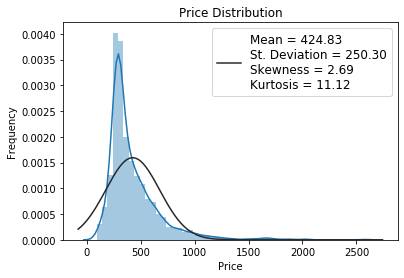

In [1048]:
# Analysing the Submitted Test 'Price'
sns.distplot(nn_submission_data['Price'], fit = norm)
(m, std) = norm.fit(nn_submission_data['Price'])

# Checking and measuring Skewness and Kurtosis.
plt.legend(['Mean = {:.2f}\nSt. Deviation = {:.2f}\nSkewness = {:.2f}\nKurtosis = {:.2f}'.format(m, std, nn_submission_data['Price'].skew(), nn_submission_data['Price'].kurt())], fontsize = 12)
plt.ylabel('Frequency')
plt.title('Price Distribution')

# Checking the parameters of Test 'Price' whether they are close to our Train Data 'Price' or not.
nn_submission_data.describe()

Text(0.5, 1.0, 'Price Distribution')

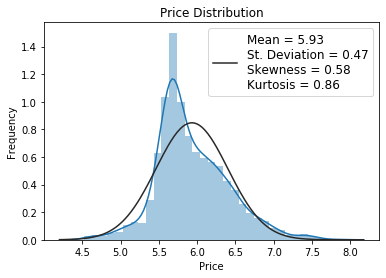

In [1049]:
# Now let's fix the skewness and kurtosis.
# Fixing all skewed data to be more normal.
# The Numpy fuction log1p applies log(1+x) to all elements of the column.
nn_submission_data['Price'] = np.log1p(nn_submission_data['Price'])

sns.distplot(nn_submission_data['Price'], fit = norm)
(m, std) = norm.fit(nn_submission_data['Price'])

# Checking and measuring Skewness and Kurtosis.
plt.legend(['Mean = {:.2f}\nSt. Deviation = {:.2f}\nSkewness = {:.2f}\nKurtosis = {:.2f}'.format(m, std, nn_submission_data['Price'].skew(), nn_submission_data['Price'].kurt())], fontsize = 12)
plt.ylabel('Frequency')
plt.title('Price Distribution')

In [1053]:
avg_prediction = pd.DataFrame()
avg_prediction['Price'] = np.expm1((nn_submission_data['Price'] + submission_data['Price'])/2)
avg_prediction.to_excel('AvgPredictions.xlsx', index = False)
avg_prediction = pd.read_excel('AvgPredictions.xlsx')
avg_prediction.head(10)

,Price
0,330.114863
1,1270.714015
2,332.370563
3,604.046226
4,384.238372
5,570.421434
6,648.857223
7,261.384915
8,416.504899
9,307.728773


,Price
count,1560.000000
mean,430.814393
std,212.938879
min,117.477387
25%,287.444200
50%,365.846449
75%,514.596129
max,1866.558545


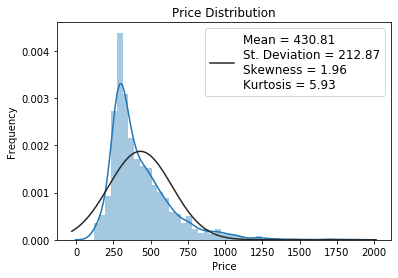

In [1054]:
# Analysing the Submitted Test 'Price'
sns.distplot(avg_prediction['Price'], fit = norm)
(m, std) = norm.fit(avg_prediction['Price'])

# Checking and measuring Skewness and Kurtosis.
plt.legend(['Mean = {:.2f}\nSt. Deviation = {:.2f}\nSkewness = {:.2f}\nKurtosis = {:.2f}'.format(m, std, avg_prediction['Price'].skew(), avg_prediction['Price'].kurt())], fontsize = 12)
plt.ylabel('Frequency')
plt.title('Price Distribution')

# Checking the parameters of Test 'Price' whether they are close to our Train Data 'Price' or not.
avg_prediction.describe()